# Data understanding 


First of all we import the libraries

In [1]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [66]:
df=pd.read_csv("dataset-progetto/train.csv", skipinitialspace=True)

-	What kind of attributes do we have?
-	How is the data quality?
-	Does a visualization help?
-	Are attributes correlated?
-	What about outliers?
-	How are missing values handled?
-	Do we need to extract other attributes?

## What kind of attributes do we have?

In [3]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


In [4]:
df.shape

(15000, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [99]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.describe(include="all")

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
count,15000,1.500000e+04,15000,15000.000000,15000,15000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000,15000
unique,15000,NaN,2,NaN,6257,9820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
top,Long Road,NaN,False,NaN,Vybz Kartel,The Hardcore Archive Part 3 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j-dance
freq,1,NaN,14034,NaN,80,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750
mean,NaN,2.468075e+05,NaN,27.423667,NaN,NaN,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647,NaN
std,NaN,1.279941e+05,NaN,18.587534,NaN,NaN,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616,NaN
min,NaN,8.586000e+03,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116,NaN
25%,NaN,1.800000e+05,NaN,14.000000,NaN,NaN,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953,NaN
50%,NaN,2.278260e+05,NaN,24.000000,NaN,NaN,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916,NaN
75%,NaN,2.889030e+05,NaN,42.000000,NaN,NaN,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057,NaN


## How is the data quality?

Valori duplicati nel DataFrame

In [76]:
duplicate_rows = df.duplicated()

rows= duplicate_rows.any()

# Stampa il risultato
if rows:
    print("There are some duplicated rows in the DataFrame.")
else:
    print("There aren't duplicated rows in the DataFrame.")

There aren't duplicated rows in the DataFrame.


In [84]:
names=df["name"]

duplicate_names = names.duplicated()
rows= duplicate_names.any()

# Stampa il risultato
if rows:
    print("There are some duplicated names in the DataFrame.")
else:
    print("There aren't duplicated names in the DataFrame.")


There aren't duplicated names in the DataFrame.


We notice that all the attributes that indicate the "genre" of the songs have the same frequency (quante volte è ripetuto quel genere)

In [37]:
genre_counts = df['genre'].value_counts()
print(genre_counts)

j-dance          750
iranian          750
brazil           750
chicago-house    750
forro            750
idm              750
indian           750
study            750
disney           750
afrobeat         750
mandopop         750
techno           750
sleep            750
spanish          750
j-idol           750
industrial       750
happy            750
bluegrass        750
black-metal      750
breakbeat        750
Name: genre, dtype: int64


Gli artisti più frequenti

In [40]:
artists_counts = df['artists'].value_counts()
print(artists_counts.head(10))

Vybz Kartel                    80
Germaine Franco                75
Scooter                        74
Sarah, the Illstrumentalist    69
Jay Chou                       67
The Prophet                    64
Alphaxone                      56
Shiritsu Ebisu Chugaku         53
Nogizaka46                     53
Rammstein                      53
Name: artists, dtype: int64


## Correlation

In [101]:
df.corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
duration_ms,1.000000,-0.048723,-0.076202,-0.080932,0.102996,0.016712,0.039403,-0.023310,-0.074774,-0.184902,0.079685,-0.021184,-0.141938,0.048765,0.999918,0.009033,0.839313,0.838041,-0.005830,-0.010400
explicit,-0.048723,1.000000,-0.013096,0.056992,0.124405,-0.000991,0.131777,-0.042846,0.294287,-0.113975,-0.125101,0.006995,0.008631,0.016972,-0.048699,0.051260,-0.039830,-0.039435,0.029119,-0.005878
popularity,-0.076202,-0.013096,1.000000,0.051046,-0.056547,-0.008992,0.046703,0.073043,-0.096382,0.078424,-0.266843,0.027105,0.077652,-0.024162,-0.076228,-0.003160,-0.084774,-0.089134,-0.003665,0.008733
danceability,-0.080932,0.056992,0.051046,1.000000,0.193940,0.035311,0.385244,-0.072422,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,-0.080891,0.292167,-0.033604,-0.069332,0.011602,-0.026273
energy,0.102996,0.124405,-0.056547,0.193940,1.000000,0.057815,0.720907,-0.079969,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.102985,0.204646,0.243586,0.208615,0.040022,-0.037847
key,0.016712,-0.000991,-0.008992,0.035311,0.057815,1.000000,0.047718,-0.157515,0.018157,-0.049867,-0.001532,-0.007420,0.028221,0.022414,0.016786,0.028388,0.027133,0.022042,0.019790,-0.490366
loudness,0.039403,0.131777,0.046703,0.385244,0.720907,0.047718,1.000000,-0.033544,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.039415,0.250568,0.165565,0.131064,0.049174,-0.020563
mode,-0.023310,-0.042846,0.073043,-0.072422,-0.079969,-0.157515,-0.033544,1.000000,-0.064289,0.085246,-0.080035,0.015738,-0.006907,-0.013001,-0.023409,-0.019378,-0.030685,-0.027687,0.003698,0.261129
speechiness,-0.074774,0.294287,-0.096382,0.111454,0.143454,0.018157,0.109793,-0.064289,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,-0.074722,0.080739,-0.043217,-0.040820,0.026399,-0.022909
acousticness,-0.184902,-0.113975,0.078424,-0.199082,-0.699454,-0.049867,-0.552519,0.085246,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.184846,-0.139706,-0.283324,-0.248164,-0.021155,0.022684


We can see that there are some significant correlation:

- loudness and energy with a correlation of 0,72
- acousticness and energy with a negative correlation of -0.69
- feature_duration_ms and duration_ms with a correlation of 0,99
- feature_duration_ms with a correlation of 0,83 with n_beats and n_bars
- n_beats and n_bars with 0,98
- acousticness and loudness with a enagtive correlation of -0,55

feature_duration_ms is practically the same as duration_ms, so we can may remove it. Furthermore we can convert from ms in minute to have numbers more easy to read and more common to represent the duration of the songs

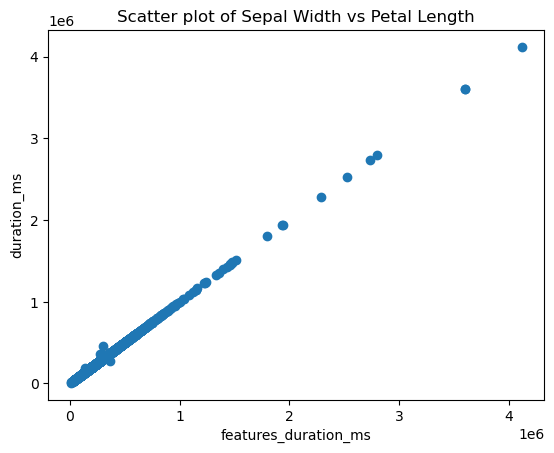

In [102]:
plt.scatter(df['features_duration_ms'], df['duration_ms'])  # Plotting sepal width against petal length.
plt.xlabel('features_duration_ms')
plt.ylabel('duration_ms')
plt.title('Scatter plot of features_duration_ms vs duration_ms')
plt.show()

## Missing values

In [86]:
print(df.isnull().sum())

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64


These attributes have some missing values:

- mode: 4450
- time_signature: 2062
- popularity_confidence: 12783

### Gestione missing values

- Popularity_confidence is an attribute that doesn't adds nothing to the global information of the DataFrame, furthermore this attribute have too much missing values, so we may remove it

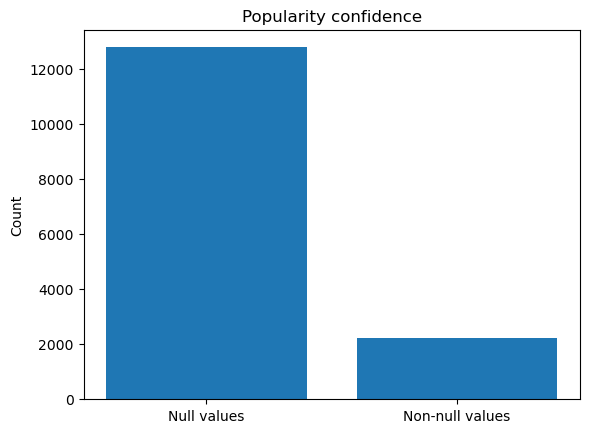

In [9]:
missing_values_pop_conf=df['popularity_confidence'].isnull().sum()
data=df['popularity_confidence'].shape[0]
non_null=data-missing_values_pop_conf
objects = ("Null values", "Non-null values")

y_pos = np.arange(len(objects))
performance = [missing_values_pop_conf,non_null]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Popularity confidence')

plt.show()

- Intendendo mode(vedi definizione) come accordi minori o maggiori e ipotizzando che minori sono canzoni tristi mentre maggiori felici.
Si può immaginare che magari un genere sia più triste o felice di un altro(x esempio genre:'happy' avrà probabilmente molti mode maggiori).
Quindi x i missing value di mode possiamo fare riferimento ai valori di genre (usando magari una moda )

nell'attributo mode anche se è un float64 abbiamo solo valori 0.0 o 1.0 o NaN, quindi probabilmente potremmo fare la binarization e trasformarlo in un attributo binario. 

In [88]:
mode=list(df["mode"])
print(mode[0:20])

[1.0, 0.0, nan, 1.0, 1.0, nan, 1.0, nan, nan, 1.0, 1.0, 0.0, 1.0, nan, nan, nan, 0.0, nan, nan, 0.0]


For the binarization we must remove the missing values, if we have some important correlation we can calculate the missing value based on other values, but if we haven't important correlation we can substitute the missing values with the mode or caluclating him form the genre that can be more happy or sad. 

In [95]:
correlations = df.corr(method="pearson")
print(correlations["mode"])

duration_ms             -0.023310
explicit                -0.042846
popularity               0.073043
danceability            -0.072422
energy                  -0.079969
key                     -0.157515
loudness                -0.033544
mode                     1.000000
speechiness             -0.064289
acousticness             0.085246
instrumentalness        -0.080035
liveness                 0.015738
valence                 -0.006907
tempo                   -0.013001
features_duration_ms    -0.023409
time_signature          -0.019378
n_beats                 -0.030685
n_bars                  -0.027687
popularity_confidence    0.003698
processing               0.261129
Name: mode, dtype: float64


Since there are no important correlations, we will use the mode to substitute the missing values

In [100]:
df["mode"].mode()[0]

1.0

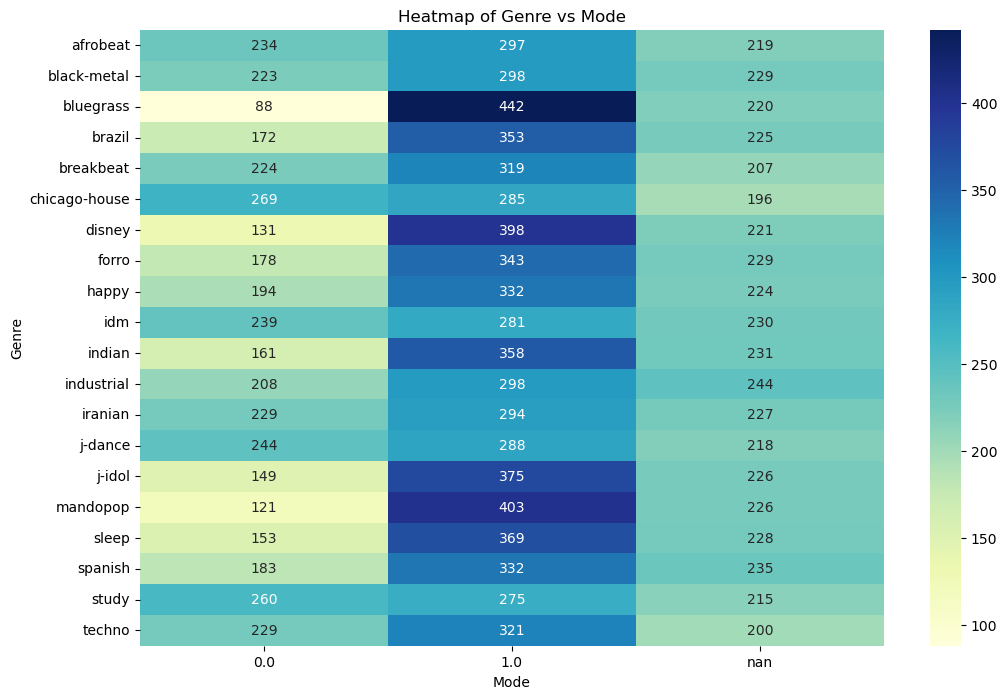

In [137]:
df['mode'] = df['mode'].astype(str)

# Calcolo nuovamente della tabella di contingenza tra 'genre' e 'mode' dopo la conversione
contingency_table = pd.crosstab(df['genre'], df['mode'])

# Creazione di un heatmap per visualizzare la relazione tra 'genre' e 'mode'
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap of Genre vs Mode')
plt.xlabel('Mode')
plt.ylabel('Genre')
plt.show()

## Outliers

I create a new attribute called "num_artists" that counts how many artists made a track and I see the distribution of the number of artists in any song

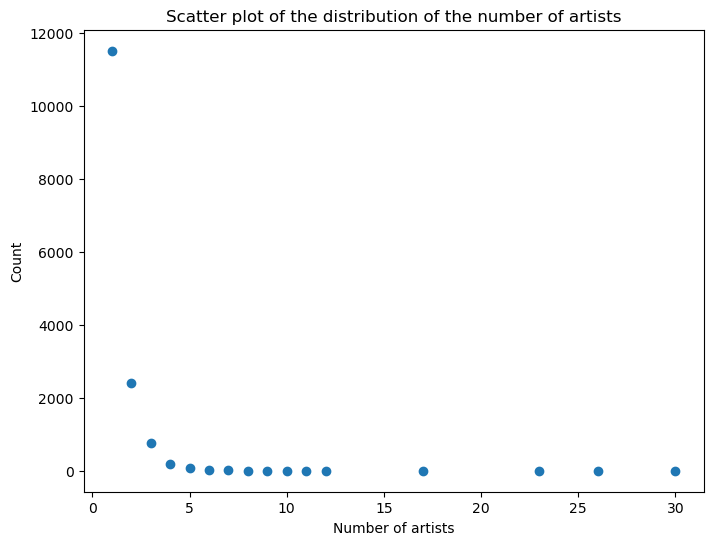

In [132]:
df['num_artists'] = df['artists'].str.split(';').apply(len)
artist_counts = df['num_artists'].value_counts().sort_index()

plt.figure(figsize=(8, 6))

plt.scatter(artist_counts.index,  artist_counts.values)  # Plotting sepal width against petal length.
plt.ylabel('Count')
plt.xlabel('Number of artists')
plt.title('Scatter plot of the distribution of the number of artists')
plt.show()

## Visualization

Continuos attributes

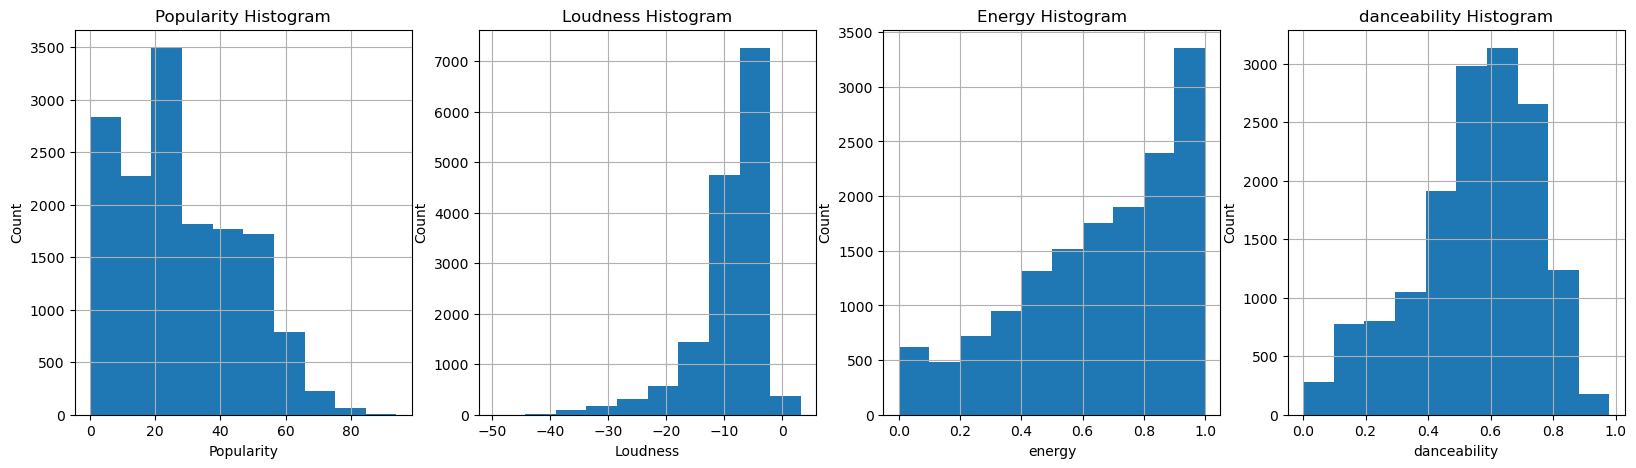

In [125]:
fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['popularity'].hist()
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Popularity Histogram')

plt.subplot2grid(fig_dims, (0, 1))
df['loudness'].hist()
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.title('Loudness Histogram')

plt.subplot2grid(fig_dims, (0, 2))
df['energy'].hist()
plt.xlabel('energy')
plt.ylabel('Count')
plt.title('Energy Histogram')

plt.subplot2grid(fig_dims, (0, 3))
df['danceability'].hist()
plt.xlabel('danceability')
plt.ylabel('Count')
plt.title('danceability Histogram')

plt.show()

Categorical attributes

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- Modificare duration_ms in duration da millisecondi a minuti

In [13]:
df_copy = df.copy()
df_copy["duration_m"] = df_copy["duration_ms"] / (60 * 1000)  # Converti da millisecondi a minuti
del df_copy['duration_ms']
df_copy.head()


,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,...,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,duration_m
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,...,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance,4.029333
1,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,...,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian,7.400000
2,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,...,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal,5.558433
3,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,...,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass,4.496667
4,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,...,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy,5.127517


In [14]:
df_copy = df.copy()
df_copy["duration_m"] = df_copy["duration_ms"] / (60 * 1000)  # Converti da millisecondi a minuti
df_copy["duration_m"] = (df_copy["duration_m"] * 2).round() / 2
del df_copy['duration_ms']
df_copy.head()


,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,...,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,duration_m
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,...,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance,4.0
1,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,...,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian,7.5
2,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,...,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal,5.5
3,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,...,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass,4.5
4,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,...,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy,5.0


In [28]:
embarked_locs = sorted(df['mode'].unique())
embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs) + 1)))
print(embarked_locs_mapping)

df_copy['mode'] = df['mode'].map(embarked_locs_mapping).astype(int)
df_copy.head()

{0.0: 0, 1.0: 1, nan: 2}


,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,...,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,duration_m
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1,...,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance,4.0
1,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0,...,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian,7.5
2,Ondskapens Galakse,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,2,...,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal,5.5
3,Can't Look Away,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1,...,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass,4.5
4,Thunderground,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1,...,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy,5.0


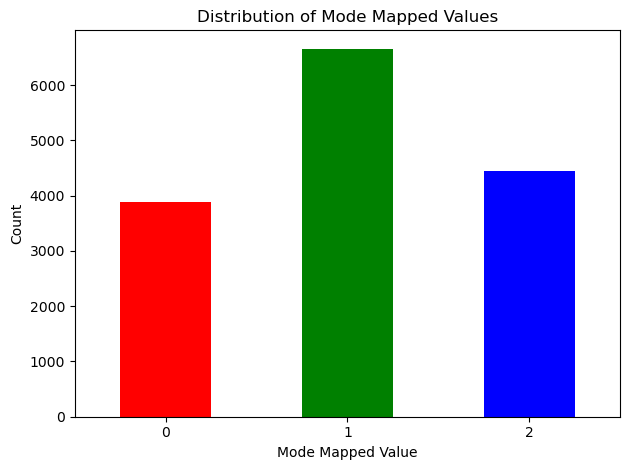

In [32]:
df_copy['mode'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])

# Imposta le etichette e il titolo
plt.xlabel('Mode Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of Mode Mapped Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()